In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from matplotlib import pyplot
import matplotlib
from PySDM_examples.deJong_Mackay_2022 import Settings
from PySDM_examples.deJong_Mackay_2022 import run_box_breakup, run_box_NObreakup
from atmos_cloud_sim_uj_utils import show_plot

## TODO
- It seems as though the Ec is just controlling the collisions and fragmentation isn't actually happening
- Need to rethink/rescale/reformulate the fragment size calculation

## Sensitivity to Ec (coalescence efficiency)

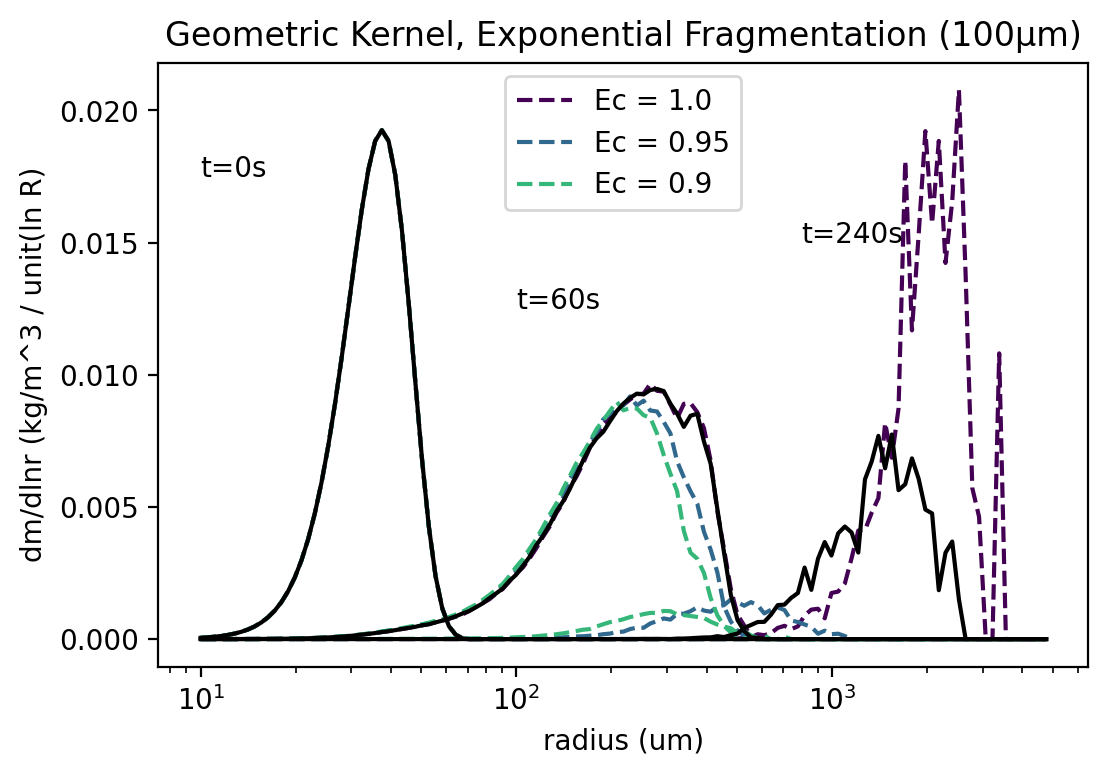

In [24]:
from PySDM.dynamics.collisions.coalescence_efficiencies import Berry1967, ConstEc

settings = Settings()
t_steps = [0, 60, 240]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

Ec_vals = [1.0, 0.95, 0.9]

pyplot.figure(figsize=(6,4),dpi=200)
for (i, Ec) in enumerate(Ec_vals):
    setattr(settings, 'coal_eff', ConstEc(Ec=Ec))
    (x,y) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        lbl = 'Ec = ' + str(Ec)
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(Ec_vals)),linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

settings.coal_eff = Berry1967()
(x,y) = run_box_breakup(settings, t_steps)
for (j, step) in enumerate(t_steps):
    pyplot.plot(x,y[j]*settings.rho, color='k')
    legend_entries.append('Berry 1967')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel, Exponential Fragmentation (100µm)")

pyplot.savefig('Ec_sensitivity.png')

## Exp Frag, mu sensitivity

9.999999999999999e-06
9.999999999999999e-05


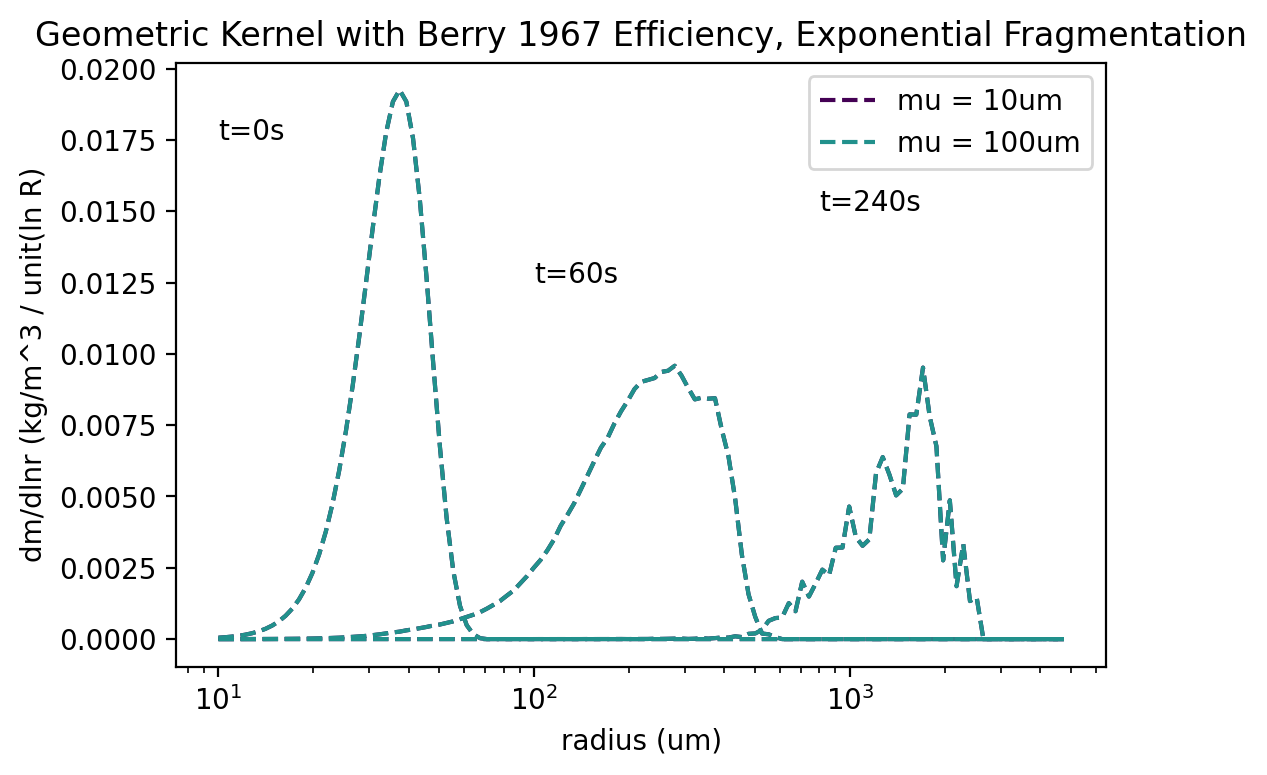

In [8]:
from PySDM.dynamics.collisions.breakup_fragmentations import ExponFrag, Gaussian
from PySDM.physics.constants import si

settings = Settings()
t_steps = [0, 60, 240]
cmap = matplotlib.cm.get_cmap('viridis')
legend_entries = []

mu_vals = [10, 100]

# TODO: fix Gaussian fragmentation
# settings.fragmentation = Gaussian(mu = 100 * si.micrometres, scale=25 * si.micrometres)
# (x,y) = run_box_breakup(settings, t_steps)
# for (j, step) in enumerate(t_steps):
#     pyplot.plot(x,y[j]*settings.rho, color='k')
#     legend_entries.append('Gaussian')

pyplot.figure(figsize=(6,4),dpi=200)
for (i, mu) in enumerate(mu_vals):
    settings.fragmentation = ExponFrag(scale=mu * si.micrometres)
    print(settings.fragmentation.scale)
    (x,y) = run_box_breakup(settings, t_steps)
    for (j, step) in enumerate(t_steps):
        lbl = 'mu = ' + str(mu) + 'um'
        pyplot.plot(x,y[j]*settings.rho, color=cmap(i/len(mu_vals)),linestyle='--',
                label= lbl if lbl not in pyplot.gca().get_legend_handles_labels()[1] else '')

pyplot.xscale("log")
pyplot.xlabel("radius (um)")
pyplot.ylabel("dm/dlnr (kg/m^3 / unit(ln R)")
pyplot.legend()
pyplot.annotate('t=0s',(10.0, 0.0175))
pyplot.annotate('t='+str(t_steps[1])+'s',(100.0, 0.0125))
pyplot.annotate('t='+str(t_steps[2])+'s',(800.0, 0.015))
pyplot.title("Geometric Kernel with Berry 1967 Efficiency, Exponential Fragmentation")
pyplot.savefig('exp_mu_sensitivity.png')
